In [1]:
import os
import json
from pprint import pprint
import random
from matplotlib import pyplot as plt
from nltk.corpus import words

DATA_PATH = "C:/Users/Russell/Documents/School-Work/CMSC470/crossword_puzzles/data/nyt_crosswords-cleaned"

In [2]:
puzzles_available = []

for year in os.listdir(DATA_PATH):
    if not year.isdecimal(): continue       # skip README.md
    for month in os.listdir(os.path.join(DATA_PATH, year)):
        for day in os.listdir(os.path.join(DATA_PATH, year, month)):
            puzzles_available.append((int(year), int(month), int(day.split(".")[0])))

puzzles_available

[(1976, 1, 1),
 (1976, 1, 2),
 (1976, 1, 3),
 (1976, 1, 4),
 (1976, 1, 5),
 (1976, 1, 6),
 (1976, 1, 7),
 (1976, 1, 8),
 (1976, 1, 9),
 (1976, 1, 10),
 (1976, 1, 11),
 (1976, 1, 12),
 (1976, 1, 13),
 (1976, 1, 14),
 (1976, 1, 15),
 (1976, 1, 16),
 (1976, 1, 17),
 (1976, 1, 18),
 (1976, 1, 19),
 (1976, 1, 20),
 (1976, 1, 21),
 (1976, 1, 22),
 (1976, 1, 23),
 (1976, 1, 24),
 (1976, 1, 25),
 (1976, 1, 26),
 (1976, 1, 27),
 (1976, 1, 28),
 (1976, 1, 29),
 (1976, 1, 30),
 (1976, 1, 31),
 (1976, 2, 1),
 (1976, 2, 2),
 (1976, 2, 3),
 (1976, 2, 4),
 (1976, 2, 5),
 (1976, 2, 6),
 (1976, 2, 7),
 (1976, 2, 8),
 (1976, 2, 9),
 (1976, 2, 10),
 (1976, 2, 11),
 (1976, 2, 12),
 (1976, 2, 13),
 (1976, 2, 14),
 (1976, 2, 15),
 (1976, 2, 16),
 (1976, 2, 17),
 (1976, 2, 18),
 (1976, 2, 19),
 (1976, 2, 20),
 (1976, 2, 21),
 (1976, 2, 22),
 (1976, 2, 23),
 (1976, 2, 24),
 (1976, 2, 25),
 (1976, 2, 26),
 (1976, 2, 27),
 (1976, 2, 28),
 (1976, 2, 29),
 (1976, 3, 1),
 (1976, 3, 2),
 (1976, 3, 3),
 (1976, 3, 4)

In [3]:
print("Puzzles Available:", len(puzzles_available))

Puzzles Available: 14545


In [4]:
year, month, day = random.choice(puzzles_available)

path = os.path.join(DATA_PATH, f"{year}", f"{month:02d}", f"{day:02d}.json")
with open(path, encoding="utf-8") as f:
    puzzle = json.load(f)

puzzle

{'acrossmap': None,
 'admin': False,
 'answers': {'across': ['INKER',
   'THANE',
   'DAR',
   'LUNGE',
   'OASIS',
   'APE',
   'KNIGHTCLUBS',
   'PPD',
   'TSARS',
   'SOPHIA',
   'COW',
   'BEIGE',
   'ONAN',
   'ARID',
   'KNOWTALENT',
   'METES',
   'DEUCE',
   'POSTITS',
   'STICKER',
   'ELENA',
   'DANTE',
   'KNICKNAMES',
   'TOON',
   'AUNT',
   'PASTA',
   'TNT',
   'BASSES',
   'SERIF',
   'ONE',
   'KNEWENGLAND',
   'OCT',
   'GIVEN',
   'OSIER',
   'MES',
   'STATE',
   'TARDY'],
  'down': ['ILK',
   'NUN',
   'KNITWITS',
   'EGGS',
   'REHAB',
   'TOCSIN',
   'HAL',
   'ASU',
   'NIBS',
   'ESSO',
   'DAPHNE',
   'APPIAN',
   'REDANT',
   'TREK',
   'POLECAT',
   'CAMP',
   'OREO',
   'GOD',
   'EWES',
   'DETECTS',
   'TUT',
   'ACID',
   'SILK',
   'TEN',
   'SNAP',
   'KNOTFAIR',
   'ETON',
   'RENT',
   'AMA',
   'KABOOM',
   'NUANCE',
   'INSETS',
   'ESSENE',
   'STEN',
   'ARGOT',
   'EKGS',
   'SNIT',
   'ILSA',
   'EVA',
   'WET',
   'NED',
   'DRY']},
 'author'

In [5]:
answer_freqs = {}

for year, month, day in puzzles_available:
    path = os.path.join(DATA_PATH, f"{year}", f"{month:02d}", f"{day:02d}.json")
    with open(path, encoding="utf-8") as f:
        try:
            puzzle = json.load(f)
        except json.JSONDecodeError:
            print("Malformed puzzle at", path)
        for a in puzzle["answers"]["across"] + puzzle["answers"]["down"]:
            answer_freqs[a] = answer_freqs.get(a, 0) + 1

answer_freqs

{'AHEM': 185,
 'NANA': 214,
 'CLOVE': 25,
 'DIVA': 116,
 'OWES': 99,
 'LAVAS': 6,
 'AMEN': 459,
 'MANICURIST': 2,
 'MANDRAKE': 5,
 'ABIDE': 98,
 'AIDE': 277,
 'RIMA': 29,
 'SPARES': 29,
 'MANATEES': 8,
 'EOSIN': 57,
 'DOZEN': 30,
 'LAT': 123,
 'ASSN': 191,
 'SORES': 63,
 'DOGE': 57,
 'TIE': 298,
 'ETWAS': 3,
 'REPEL': 73,
 'OTTOMANS': 4,
 'CAMERA': 45,
 'LUMS': 2,
 'SARA': 215,
 'LADLE': 95,
 'FUMANCHU': 2,
 'MANHANDLED': 1,
 'DOUR': 52,
 'GROAT': 13,
 'DADE': 77,
 'ELLA': 401,
 'TANTE': 42,
 'STEN': 286,
 'DEAL': 126,
 'ADAM': 377,
 'HIMA': 2,
 'EVEN': 335,
 'MANDARIN': 12,
 'NOMADS': 17,
 'AWAKE': 57,
 'NENE': 211,
 'ASI': 212,
 'CLUBMAN': 1,
 'LARIAT': 45,
 'OVID': 134,
 'VASE': 78,
 'EST': 542,
 'CAINES': 1,
 'RIEN': 58,
 'RAZES': 24,
 'SEATO': 98,
 'POSIT': 59,
 'ASSET': 298,
 'MORAS': 3,
 'ELOPE': 215,
 'EAGER': 136,
 'STELA': 65,
 'DOWNS': 9,
 'STAMEN': 39,
 'DEMANDED': 8,
 'EMULATE': 29,
 'RARA': 174,
 'OLDHAT': 27,
 'CAMDEN': 10,
 'SUEDE': 73,
 'LARA': 178,
 'ANON': 463,
 'FLA

In [6]:
answer_freqs_sorted = sorted(answer_freqs.items(), key=lambda item: item[1], reverse=True)
pprint(answer_freqs_sorted[:20])
# pprint(answer_freqs[-10:])

[('AREA', 896),
 ('ERA', 883),
 ('ERIE', 819),
 ('ERE', 750),
 ('ALOE', 723),
 ('ONE', 703),
 ('ARIA', 684),
 ('ORE', 679),
 ('ALE', 665),
 ('ANTE', 658),
 ('EDEN', 652),
 ('ATE', 651),
 ('ELI', 645),
 ('ENE', 632),
 ('ELSE', 624),
 ('ARE', 610),
 ('ETA', 595),
 ('ERR', 589),
 ('ALI', 585),
 ('SPA', 576)]


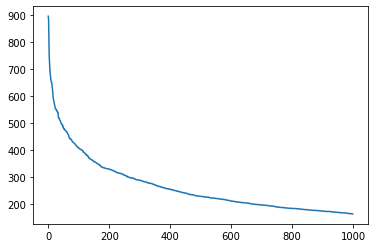

In [7]:
N = 1000    # len(answer_freqs)
ranks = range(N)
freqs = sorted(answer_freqs.values(), reverse=True)[:N]

fig, ax = plt.subplots()
ax.plot(ranks, freqs)
# ax.set_yscale("log")

In [8]:
import nltk
nltk.download('words')
ENGLISH_WORDS = set(w.upper() for w in words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Russell\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [9]:
def is_english_ngram(string, n):
    if n == "":
        return False
    elif n == 1:
        return string in ENGLISH_WORDS
    
    for i in range(1, len(string) - 1):
        head, tail = string[:i], string[i:]
        if is_english_ngram(head, 1) and is_english_ngram(tail, n-1):
            return True
    
    return False


total_clues = sum(answer_freqs.values())
ngram_counts = [0] * 3

exceptions = set(answer_freqs.keys())

for a in answer_freqs:
    for n in range(1, 4):
        if is_english_ngram(a, n):
            if n==3: print(n, a)
            ngram_counts[n-1] += answer_freqs[a]
            exceptions.remove(a)
            break

for n in range(1, 4):
    print(f"Percentage of answers that are english {n}-grams: {ngram_counts[n-1]/total_clues:0.3%}")

print(f"Total: {sum(ngram_counts)/total_clues:0.3%}")

3 MANATEES
3 SORES
3 OVID
3 RIEN
3 RAZES
3 ADIOS
3 CPAS
3 INTERS
3 TERCE
3 MOTHEROFPEARL
3 LOVERSOF
3 PATTERS
3 HITSOUTAT
3 LAVERS
3 SUNDAES
3 SURRENDEROFCORNWALLIS
3 SPAS
3 ARGENTIA
3 CITEDFOR
3 BENNINGTON
3 PTERO
3 FACERS
3 EVANSTON
3 UTTERS
3 AJAX
3 ROBERTEDWARDLEE
3 OISE
3 HEARTOFDARKNESS
3 LEERS
3 OREBRO
3 ISSUED
3 COHAN
3 IRONS
3 LEASES
3 ACUS
3 EGIS
3 RATIOS
3 UFER
3 PROS
3 COVEREDWAGONS
3 SAFER
3 RUED
3 XENO
3 ETES
3 FOUNDINGFATHERS
3 IMOGENE
3 PEALE
3 LIAISONPLANES
3 DIXON
3 NAGOYA
3 NOSERS
3 CASAS
3 GOODTIMEGAL
3 OSIERS
3 MOVES
3 SFAX
3 EERO
3 ADDSONTO
3 STONEY
3 CHINESEMAINLAND
3 TREER
3 ETTE
3 EINE
3 OTELS
3 SWEDES
3 OGEES
3 EMANATED
3 POTHOLES
3 SIXTYFOURDOLLAR
3 WOMANSINTUITION
3 DOASISAY
3 LADIESINWAITING
3 COTTAS
3 IOTAS
3 UXOR
3 OXIAE
3 CHECKOUTTIMES
3 CHECKSUPON
3 TIDIEST
3 CHEKKER
3 TRISTE
3 ACES
3 OBLATES
3 ESTERS
3 TRES
3 IBSEN
3 TAKETHEIRCOURSE
3 MINISTERSTO
3 ILSE
3 SEESTO
3 FORESTFIRES
3 FLUORO
3 PEENS
3 ORATIONS
3 FACES
3 TOBESELFEVIDENT
3 ANITAS
3 ERNES
3 STAR

In [10]:
exceptions

{'MIDDLEC',
 'BALACLAVAS',
 'PARSECS',
 'DROVEHOMEAPOINT',
 'DOYOULOVEME',
 'EVERGLADS',
 'FORTHEANSWERSEE',
 'PATTERISTS',
 'SHOWMETHEMONKEY',
 'DRIPDRIES',
 'CROHN',
 'LIDDY',
 'SCROOGEMCDUCK',
 'BRIARY',
 'CHN',
 'NOXZEMA',
 'BARNEYFIEF',
 'GOODIEFORNOTHING',
 'KAPELLMEISTER',
 'CLUELESSREPLIES',
 'AMBLEOFTHEMILL',
 'WHOISSYLVIAPORTER',
 'MINTS',
 'LMN',
 'THERETURNOFTHENAIVE',
 'DYNAMITES',
 'FACS',
 'TOWNCLERKS',
 'POLLSPOLES',
 'PILINGS',
 'DINETTESETS',
 'DLRS',
 'YOYODIETERS',
 'URL',
 'TEDEUMS',
 'SLEWS',
 'RELAYRACES',
 'FRENESI',
 'STRAUSSWALTZES',
 'ADOPTS',
 'COOKIELAVAGETTO',
 'RSV',
 'BENDIX',
 'PLOYS',
 'DIAMONDLIL',
 'MASHEDPEAS',
 'TURKS',
 'CLOGCABINS',
 'RALPHNADER',
 'KODIAKBROWNBEAR',
 'ADVILPM',
 'DEI',
 'EMIRS',
 'SUPPORTGROUPS',
 'STEVIEWONDERS',
 'BULLDOZERS',
 'NUANCED',
 'WALTDISNEYPOOCH',
 'HUGHS',
 'SPARETHEDETAILS',
 'OSSIEDAVIS',
 'MILLARDFILLMORE',
 'ILICITO',
 'DEPARTMENTSTORES',
 'VOTES',
 'VIOLINSDOESTAKE',
 'SEVENDEADLYSINS',
 'GUCCI',
 'SUBSOILS',
